# Philippine Poverty Statistics - EDA

## Read Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('povstat_processed.csv')
df

,Unnamed: 0,Variable,Year,province,value,adm_level,region,unit
0,0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
1,1,Annual Per Capita Poverty Threshold (in Pesos),2006,1st District,"15,699",District,NCR,in Pesos
2,2,Annual Per Capita Poverty Threshold (in Pesos),2009,1st District,"19,227",District,NCR,in Pesos
3,3,Annual Per Capita Poverty Threshold (in Pesos),2012,1st District,"20,344",District,NCR,in Pesos
4,4,Annual Per Capita Poverty Threshold (in Pesos),2015,1st District,"25,007",District,NCR,in Pesos
...,...,...,...,...,...,...,...,...
3600,3600,Magnitude of Subsistence Poor Population,1991,Zamboanga del Sur,NaN,Province,Region IX,population
3601,3601,Magnitude of Subsistence Poor Population,2006,Zamboanga del Sur,"268,576",Province,Region IX,population
3602,3602,Magnitude of Subsistence Poor Population,2009,Zamboanga del Sur,"261,992",Province,Region IX,population
3603,3603,Magnitude of Subsistence Poor Population,2012,Zamboanga del Sur,"209,765",Province,Region IX,population


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3605 non-null   int64 
 1   Variable    3605 non-null   object
 2   Year        3605 non-null   int64 
 3   province    3605 non-null   object
 4   value       3010 non-null   object
 5   adm_level   3360 non-null   object
 6   region      3360 non-null   object
 7   unit        3605 non-null   object
dtypes: int64(2), object(6)
memory usage: 225.4+ KB


## Data Preparation

### Cleanup
Before further data preparation, I first drop the unneeded index column and rename columns for consistency.

In [4]:
# Drop first column (index) as Pandas dataframe already adds index
df.drop(columns=df.columns[[0]], axis=1, inplace=True)

In [5]:
# Rename columns
df.rename(columns = {
    'Variable': 'Variable',
    'Year': 'Year',
    'province': 'Province',
    'value': 'Value',
    'adm_level': 'Admin_Lvl',
    'region': 'Region',
    'unit': 'Unit'
}, inplace=True)

### Inspect unique values
To get a general view of the dataset, I then inspect the unique values of each column. This helps give a grasp of:
- How diverse the values are per column
- The datatype of each column
- Missing values (if any)

In [6]:
# Print counts of unique values per column
print("Unique value counts per column:")
df.nunique()

Unique value counts per column:


Variable        7
Year            5
Province      103
Value        2168
Admin_Lvl       4
Region         18
Unit            4
dtype: int64

In [7]:
# List unique values per column
unique_vars = df['Variable'].unique().tolist()
unique_years = df['Year'].unique().tolist()
unique_admins = df['Admin_Lvl'].unique().tolist()
unique_regions = df['Region'].unique().tolist()
unique_units = df['Unit'].unique().tolist()

In [8]:
print("Unique values in Variable:")
print("\n".join(map(str, unique_vars)))

Unique values in Variable:
Annual Per Capita Poverty Threshold (in Pesos)
Poverty Incidence among Families (%)
Magnitude of Poor Families
Poverty Incidence among Population (%)
Magnitude of Poor Population
Subsistence Incidence among Population (%)
Magnitude of Subsistence Poor Population


In [9]:
print("Unique values in Year:")
print("\n".join(map(str, unique_years)))

Unique values in Year:
1991
2006
2009
2012
2015


In [10]:
print("Unique values in Admin_Lvl:")
print("\n".join(map(str, unique_admins)))

Unique values in Admin_Lvl:
District
Region
Province
nan
Country


In [11]:
print("Unique values in Region:")
print("\n".join(map(str, unique_regions)))

Unique values in Region:
NCR
ARMM
CAR
CARAGA
Region VI
Region V
nan
Region III
Region VI-A
Region VIII
Region VII
Region X
Region II
Region XI
Region I
Region IV-B
Region XII
Philippines
Region IX


In [12]:
print("Unique values in Unit:")
print("\n".join(map(str, unique_units)))

Unique values in Unit:
in Pesos
%
families
population


From the listed unique values, the ```Value``` and ```Year``` columns appear to be numerical data, while all other columns are categorical data. This information will be used in the next section.

### Cast columns to relevant datatypes
Each column is then cast to their respective datatype for compatibility with Pandas/Seaborn/NumPy later during analysis. Only ```Value``` needs to be prepared for type conversion, which is done as below.

In [13]:
# Inspect which entries under 'Value' may cause trouble with type conversion
faulty_values = df[pd.to_numeric(df['Value'], errors='coerce').isnull()]['Value'].unique()

print(f"{len(faulty_values)} faulty values returned:")
list(faulty_values)

1671 faulty values returned:


[nan,
 '  15,699 ',
 '  19,227 ',
 '  20,344 ',
 '  25,007 ',
 '  9,906 ',
 '  12,405 ',
 '  14,343 ',
 '  12,710 ',
 '  79,109 ',
 '  84,914 ',
 '  102,591 ',
 '  82,007 ',
 '  22,528 ',
 '  8,902 ',
 '  24,855 ',
 '  28,247 ',
 '  21,168 ',
 '  19,782 ',
 '  21,727 ',
 '  183,449 ',
 '  131,502 ',
 '  104,495 ',
 '  137,392 ',
 '  13,020 ',
 '  17,896 ',
 '  16,828 ',
 '  15,456 ',
 '  18,631 ',
 '  19,306 ',
 '  18,266 ',
 '  22,352 ',
 '  113,009 ',
 '  113,585 ',
 '  100,451 ',
 '  115,990 ',
 '  21,823 ',
 '  30,476 ',
 '  10,459 ',
 '  19,967 ',
 '  16,570 ',
 '  11,095 ',
 '  24,138 ',
 '  23,457 ',
 '  124,306 ',
 '  73,457 ',
 '  153,295 ',
 '  159,242 ',
 '  34,761 ',
 '  7,262 ',
 '  22,004 ',
 '  22,469 ',
 '  5,201 ',
 '  12,647 ',
 '  16,683 ',
 '  20,517 ',
 '  21,563 ',
 '  104,747 ',
 '  205,834 ',
 '  212,494 ',
 '  271,355 ',
 '  296,999 ',
 '  631,372 ',
 '  1,450,467 ',
 '  1,507,868 ',
 '  1,854,188 ',
 '  1,990,503 ',
 '  234,254 ',
 '  529,242 ',
 '  452,480 ',

In [14]:
# Apply adjustments to entries under 'Value' to prepare for type conversion
df['Value'] = df['Value'].str.strip()
df['Value'] = df['Value'].str.replace(",", "")
df['Value'] = df['Value'].replace("-", np.NaN)

In [15]:
# Convert datatypes of all columns into more relevant ones
df = df.astype({
    'Variable': 'category',
    'Year': 'int64',
    'Province': 'category',
    'Value': 'float64',
    'Admin_Lvl': 'category',
    'Region': 'category',
    'Unit': 'category'
})

# Inspect new datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Variable   3605 non-null   category
 1   Year       3605 non-null   int64   
 2   Province   3605 non-null   category
 3   Value      3008 non-null   float64 
 4   Admin_Lvl  3360 non-null   category
 5   Region     3360 non-null   category
 6   Unit       3605 non-null   category
dtypes: category(5), float64(1), int64(1)
memory usage: 80.4 KB


### Inspect missing values
Missing values are then inspected to investigate:
- How prevalent is the missing data, and in which columns?
- Are the missing data in the same format?
- How should the missing data be acted upon? Should it be excluded from analysis or does it enrich analysis?
- Is there a pattern to the missing data?
- Would the missing data still contribute to developing a better picture of poverty?

In [40]:
# Show total of missing values per column 
total = df.isna().sum()
percent = (df.isna().sum()/df.isna().count())
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Variable,0,0.000000
Year,0,0.000000
Province,0,0.000000
Value,597,0.165603
Admin_Lvl,245,0.067961
Region,245,0.067961
Unit,0,0.000000


In [50]:
# Investigate missing Admin_Lvl & Region values
# The missing values above may be linked to missing location information, 
# thus this is tested by comparing rows with missing Admin_Lvl & Region data
missing_admin = df[df['Admin_Lvl'].isna()]
missing_region = df[df['Region'].isna()]

print(f"Are all missing Admin_Lvl values also missing from Region values?: {missing_admin.equals(missing_region)}")

Are all missing Admin_Lvl values also missing from Region values?: True


In [52]:
# Next, I investigate missing values under "Value"
missing_values = df[df['Value'].isna()]
missing_values

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
5,Poverty Incidence among Families (%),1991,1st District,NaN,District,NCR,%
10,Magnitude of Poor Families,1991,1st District,NaN,District,NCR,families
15,Poverty Incidence among Population (%),1991,1st District,NaN,District,NCR,%
20,Magnitude of Poor Population,1991,1st District,NaN,District,NCR,population
...,...,...,...,...,...,...,...
3580,Magnitude of Poor Families,1991,Zamboanga del Sur,NaN,Province,Region IX,families
3585,Poverty Incidence among Population (%),1991,Zamboanga del Sur,NaN,Province,Region IX,%
3590,Magnitude of Poor Population,1991,Zamboanga del Sur,NaN,Province,Region IX,population
3595,Subsistence Incidence among Population (%),1991,Zamboanga del Sur,NaN,Province,Region IX,%


In [72]:
# From above, most missing values appear to be under 1991
# The missing values above may be linked to certain years, 
# thus this is tested by describing the data
missing_values.describe()

,Year,Value
count,597.000000,0.0
mean,1991.080402,NaN
std,1.387952,NaN
min,1991.000000,NaN
25%,1991.000000,NaN
50%,1991.000000,NaN
75%,1991.000000,NaN
max,2015.000000,NaN


Although a great majority of missing values appear under 1991 as shown above, the maximum also shows missing data from 2015 and std > 1. Hence, a box plot can be made to see the distribution of missing data across the years.

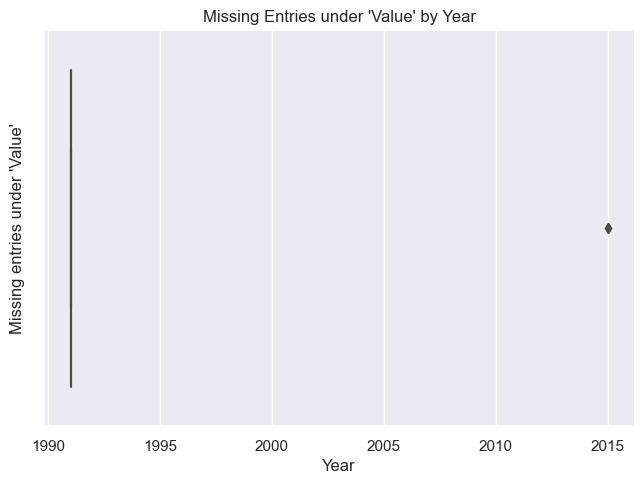

In [92]:
# PLot missing values by year
sns.boxplot(data=missing_values, x='Year')
plt.tight_layout()
plt.title("Missing Entries under 'Value' by Year")
plt.xlabel("Year")
plt.ylabel("Missing entries under 'Value'")
plt.show()

A very small amount of missing values appear to be under 2015, with the rest being under 1991. These are further investigated below:

In [93]:
# Print exact number of missing values by year
print("Count of missing entries under 'Value' by year")
missing_by_year = missing_values.groupby(by="Year")
missing_by_year.size()

Count of missing entries under 'Value' by year


Year
1991    595
2015      2
dtype: int64

In [83]:
# Inspect two missing values from 2015
missing_values.query('Year == 2015')

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
539,Magnitude of Poor Families,2015,Batanes,NaN,NaN,NaN,families
549,Magnitude of Poor Population,2015,Batanes,NaN,NaN,NaN,population


### Inspect numerical data

In [18]:
df.describe() # TODO: Replace

,Year,Value
count,3605.000000,3.008000e+03
mean,2006.600000,1.717121e+05
std,8.358192,1.049844e+06
min,1991.000000,0.000000e+00
25%,2006.000000,2.590000e+01
50%,2009.000000,1.393150e+04
75%,2012.000000,8.288250e+04
max,2015.000000,2.374590e+07


### Inspect categorical data

In [19]:
# TODO

### Inspect data by variables

In [20]:
# TODO